# 상관관계분석-공공데이터를 이용한 상관분석

- 서울특별시_관광지입장정보_2011_2016.json 
- 중국(112)_해외방문객정보_2011_2016.json 
- 일본(130)_해외방문객정보_2011_2016.json 
- 미국(275)_해외방문객정보_2011_2016.json

In [1]:
import json
import math
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc

import pandas as pd

In [2]:
#[CODE 1]
def correlation(x, y):
    n = len(x)
    vals = range(n)

    x_sum = 0.0
    y_sum = 0.0
    x_sum_pow = 0.0
    y_sum_pow = 0.0
    mul_xy_sum = 0.0
    
    for i in vals:
        mul_xy_sum = mul_xy_sum + float(x[i]) * float(y[i])
        x_sum = x_sum + float(x[i])
        y_sum = y_sum + float(y[i])
        x_sum_pow = x_sum_pow + pow(float(x[i]), 2)
        y_sum_pow = y_sum_pow + pow(float(y[i]), 2)
    
    try:
        r = ((n * mul_xy_sum) - (x_sum * y_sum)) / math.sqrt(((n*x_sum_pow) - pow(x_sum, 2)) * ((n*y_sum_pow) - pow(y_sum, 2)) )
    except:
        r = 0.0
    return r

In [3]:
#[CODE 2]    
def setScatterGraph(tour_table, fv_table, tourpoint):
    
    #[CODE 8]
    tour = tour_table[tour_table['resNm'] == tourpoint]
    merge_table = pd.merge(tour, fv_table, left_index=True, right_index=True)

    fig = plt.figure()
    
    fig.suptitle(tourpoint + '상관관계 분석')
    
    plt.subplot(1, 3, 1)
    plt.xlabel('중국인 입국수')
    plt.ylabel('외국인 입장객수')
    r1=merge_table.china.corr(merge_table.ForNum)
    #r1 = correlation(list(merge_table['china']), list(merge_table['ForNum']))
    plt.title('r = {:.5f}'.format(r1))
    plt.scatter(list(merge_table['china']), list(merge_table['ForNum']), 
                edgecolor='none', alpha=0.75, s=6, c='black')
    
    plt.subplot(1, 3, 2)
    plt.xlabel('일본인 입국수')
    plt.ylabel('외국인 입장객수')
    #r2 = correlation(list(merge_table['japan']), list(merge_table['ForNum']))
    r2=merge_table.japan.corr(merge_table.ForNum)
    plt.title('r = {:.5f}'.format(r2))
    plt.scatter(list(merge_table['japan']), list(merge_table['ForNum']), edgecolor='none', alpha=0.75, s=6, c='black')

    plt.subplot(1, 3, 3)
    plt.xlabel('미국인 입국수')
    plt.ylabel('외국인 입장객수')
    #r3 = correlation(list(merge_table['usa']), list(merge_table['ForNum']))
    r3=merge_table.usa.corr(merge_table.ForNum)
    plt.title('r = {:.5f}'.format(r3))
    plt.scatter(list(merge_table['usa']), list(merge_table['ForNum']), edgecolor='none', alpha=0.75, s=6, c='black')

    plt.tight_layout()

    #fig = matplotlib.pyplot.gcf()
    #fig.set_size_inches(10, 7)
    #fig.savefig(tourpoint+'.png', dpi=300)
 
    plt.show()
    return [tourpoint, r1, r2, r3]

In [5]:
font_location = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

    #[CODE 4]
tpFileName = 'json/서울특별시_관광지입장정보_2011_2016.json'
jsonTP = json.loads(open(tpFileName, 'r', encoding='utf-8').read())
tour_table = pd.DataFrame(jsonTP, columns=('yyyymm', 'resNm', 'ForNum'))
tour_table = tour_table.set_index('yyyymm')
tour_table

,resNm,ForNum
yyyymm,,
201101,창덕궁,14137
201101,운현궁,0
201101,경복궁,40224
201101,창경궁,697
201101,종묘,6837
...,...,...
201609,국립중앙박물관,12218
201609,덕수궁,25843
201609,서대문자연사박물관,0


In [6]:
resNm = tour_table.resNm.unique()
resNm

array(['창덕궁', '운현궁', '경복궁', '창경궁', '종묘', '국립중앙박물관', '서울역사박물관', '덕수궁',
       '서울시립미술관 본관', '태릉 ·  강릉 · 조선왕릉전시관', '서대문형무소역사관', '서대문자연사박물관',
       '트릭아이미술관', '헌릉ㆍ인릉', '선릉·정릉', '롯데월드'], dtype=object)

In [8]:
    fv_CFileName = 'json/중국(112)_해외방문객정보_2011_2016.json'
    jsonFV = json.loads(open(fv_CFileName, 'r', encoding='utf-8').read())
    china_table = pd.DataFrame(jsonFV, columns=('yyyymm', 'visit_cnt'))
    china_table = china_table.rename(columns={'visit_cnt': 'china'})
    china_table = china_table.set_index('yyyymm')
    
    fv_JFileName = 'json/일본(130)_해외방문객정보_2011_2016.json'
    jsonFV = json.loads(open(fv_JFileName, 'r', encoding='utf-8').read())
    japan_table = pd.DataFrame(jsonFV, columns=('yyyymm', 'visit_cnt'))
    japan_table = japan_table.rename(columns={'visit_cnt': 'japan'})
    japan_table = japan_table.set_index('yyyymm')

    fv_UFileName = 'json/미국(275)_해외방문객정보_2011_2016.json' 
    jsonFV = json.loads(open(fv_UFileName, 'r', encoding='utf-8').read())
    usa_table = pd.DataFrame(jsonFV, columns=('yyyymm', 'visit_cnt'))
    usa_table = usa_table.rename(columns={"visit_cnt": "usa"})
    usa_table = usa_table.set_index('yyyymm')
    
    #[CODE 7]
    fv_table = pd.merge(china_table, japan_table, left_index=True, right_index=True)
    fv_table = pd.merge(fv_table, usa_table, left_index=True, right_index=True)
    
    fv_table

,china,japan,usa
yyyymm,,,
201101,91252,209184,43065
201102,140571,230362,41077
201103,141457,306126,54610
201104,147680,239075,59616
201105,154066,241695,59780
...,...,...,...
201608,513275,148632,63522
201609,591242,157313,63793
201610,650174,180348,77878


In [15]:
def main():
    font_location = "c:/Windows/fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=font_location).get_name()
    matplotlib.rc('font', family=font_name)

    #[CODE 4]
    tpFileName = 'json/서울특별시_관광지입장정보_2011_2016.json'
    jsonTP = json.loads(open(tpFileName, 'r', encoding='utf-8').read())
    tour_table = pd.DataFrame(jsonTP, columns=('yyyymm', 'resNm', 'ForNum'))
    tour_table = tour_table.set_index('yyyymm')
    
    #[CODE 5]
    resNm = tour_table.resNm.unique()
    #[CODE 6]
    fv_CFileName = 'json/중국(112)_해외방문객정보_2011_2016.json'
    jsonFV = json.loads(open(fv_CFileName, 'r', encoding='utf-8').read())
    china_table = pd.DataFrame(jsonFV, columns=('yyyymm', 'visit_cnt'))
    china_table = china_table.rename(columns={'visit_cnt': 'china'})
    china_table = china_table.set_index('yyyymm')

    fv_JFileName = 'json/일본(130)_해외방문객정보_2011_2016.json'
    jsonFV = json.loads(open(fv_JFileName, 'r', encoding='utf-8').read())
    japan_table = pd.DataFrame(jsonFV, columns=('yyyymm', 'visit_cnt'))
    japan_table = japan_table.rename(columns={'visit_cnt': 'japan'})
    japan_table = japan_table.set_index('yyyymm')

    fv_UFileName = 'json/미국(275)_해외방문객정보_2011_2016.json' 
    jsonFV = json.loads(open(fv_UFileName, 'r', encoding='utf-8').read())
    usa_table = pd.DataFrame(jsonFV, columns=('yyyymm', 'visit_cnt'))
    usa_table = usa_table.rename(columns={"visit_cnt": "usa"})
    usa_table = usa_table.set_index('yyyymm')
    
    #[CODE 7]
    fv_table = pd.merge(china_table, japan_table, left_index=True, right_index=True)
    fv_table = pd.merge(fv_table, usa_table, left_index=True, right_index=True)

    r_list = []
    for tourpoint in resNm:
        #[CODE 9]
        r_list.append(setScatterGraph(tour_table, fv_table, tourpoint))
    
    #[CODE 10]
    r_table = pd.DataFrame(r_list, columns=('tourpoint', 'china', 'japan', 'usa'))
    r_table = r_table.set_index('tourpoint')
    r_table = r_table.drop('서울시립미술관 본관')
    r_table = r_table.drop('서대문자연사박물관')
    r_table.plot(kind='bar', rot=70)
    plt.show()

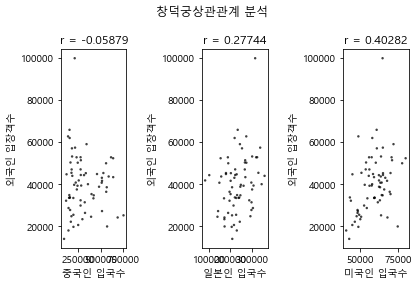

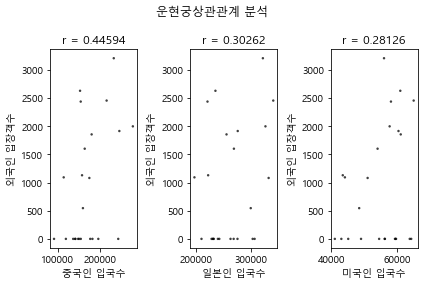

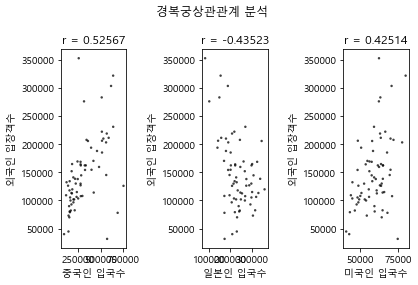

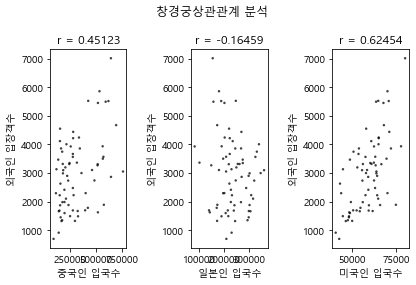

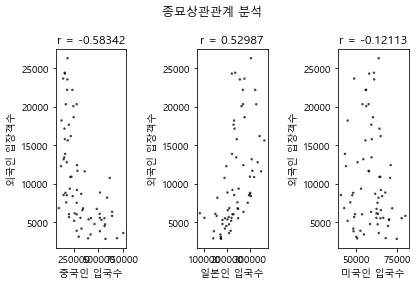

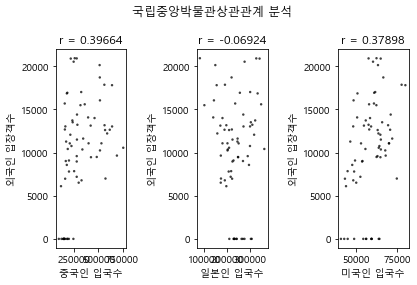

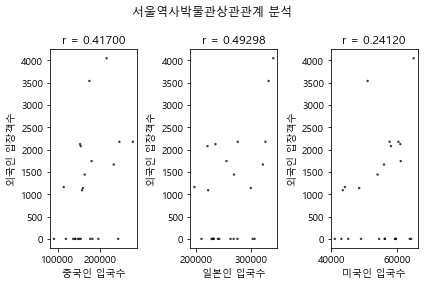

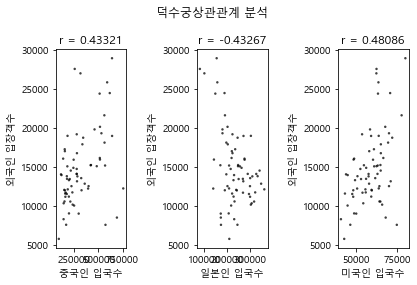

C:\Users\ADMIN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ADMIN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


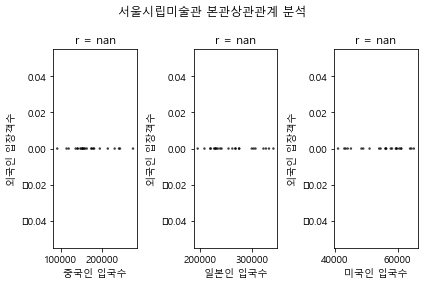

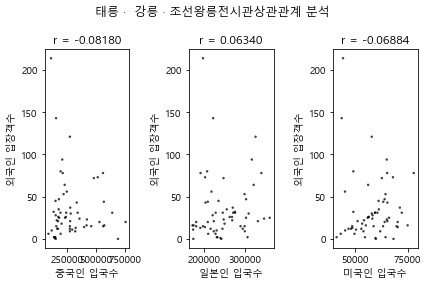

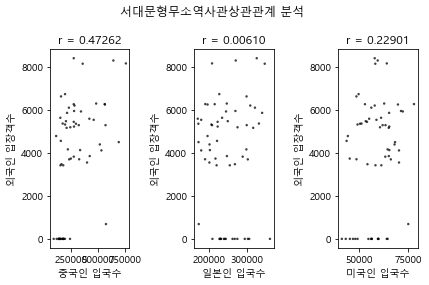

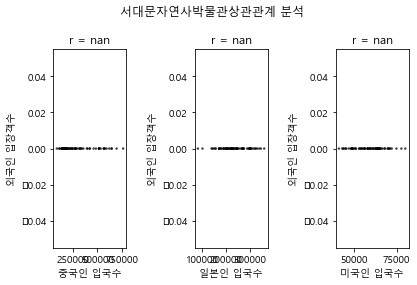

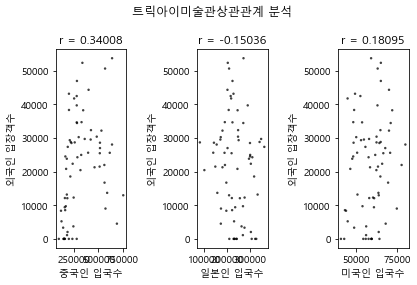

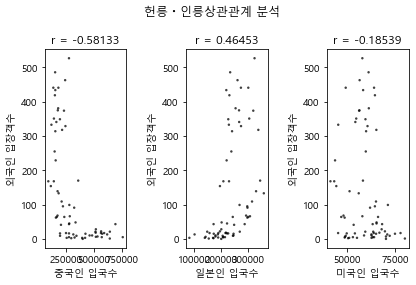

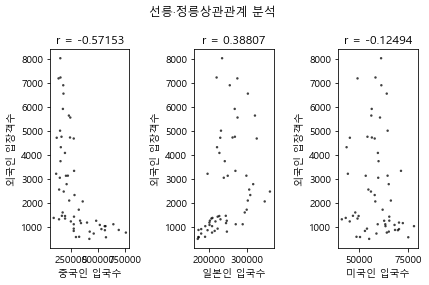

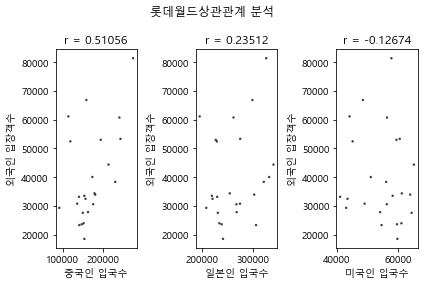

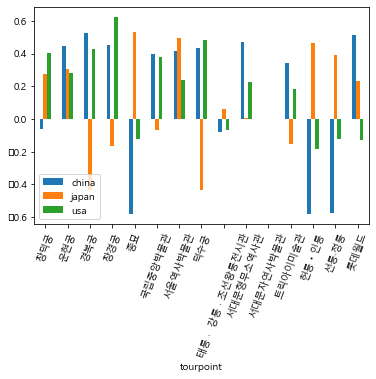

In [12]:
main()

In [ ]:
import seaborn as sns

corr=tips.corr(method='pearson')
df_heatmap=sns.heatmap(
                        corr, #상관계수값
                        cbar=True, #사이드바 표시
                        annot=True, #실제값 표시여부
                        annot_kws={'size':15}, #글자크기
                        fmt='.3f', #소수점 자릿수 지정
                        square=True, #정사각형으로 표시여부
                        cmap='Blues' #색상지정, Reds, Greens, Blues
                        ) 

In [16]:
print(type(r_table))

NameError: name 'r_table' is not defined